In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [9]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_reportedby from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df = df.dropna()
df

,inc_reportedby
2,Other
3,Other (Nurse / Midwife )
4,Nurse
5,Nurse
6,Nurse
7,Nurse
8,Nurse
9,Midwife
10,Nurse
11,Pharmacist


In [10]:
reportedby_counts = df['inc_reportedby'].value_counts()
print(reportedby_counts)
reportedby_counts = reportedby_counts.drop('',axis=0)
thresh = 8
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]
reportedby_counts_max = reportedby_counts.max()
plt.figure(figsize=(17,13))
cm = plt.get_cmap('RdYlGn')
cm_subsection = np.linspace(0, 1, len(reportedby_counts.values))
x_range = range(0,len(reportedby_counts.values))
colors = [cm(x) for x in cm_subsection]
reportedby_list = list(reportedby_counts.index)
reportedby_list_newlines = [i.replace(' ','\n') for i in reportedby_list]
num_newlines = [len(x) for x in reportedby_list_newlines]
up_or_down = [60 if x%2==0 else -320 for x in range(len(reportedby_list))]
vertical_alignment = ['bottom' if x%2==0 else 'top' for x in range(len(reportedby_list))]
for i in x_range:
    plt.scatter(i,reportedby_counts.values[i],color=colors[i],label=list(reportedby_counts.index)[i])
    #plt.text(i,reportedby_counts.values[i]+10,reportedby_list_newlines[i],ha='center',va='bottom')
    plt.annotate(reportedby_list_newlines[i], xy=(i,reportedby_counts.values[i]), xytext=(i,reportedby_counts.values[i]+up_or_down[i]), 
                 ha='center', va='bottom',
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x_range,np.zeros(len(x_range)),'--')
plt.legend(frameon=False)
plt.xticks([])
#plt.ylim(bottom=0)
plt.ylabel("number reported by")
plt.title("number of medicine patient safety events reported by different staff roles")

                                                        5126
Nurse                                                   2439
Pharmacist                                               833
Pharmacy technician                                      279
Administration / clerical / reception staff              205
Midwife                                                  171
Physician                                                126
Doctor (unknown grade)                                    79
Radiographer                                              61
Health Care Support Worker (HCSW)                         41
Pharmacy staff in training                                37
Anaesthetist                                              32
Foundation Year Doctor (First Year) (FY1)                 30
Dietician                                                 28
Other (Allied health professional)                        28
Other (Nurse / Midwife )                                  25
Manager                 

Text(0.5, 1.0, 'number of medicine patient safety events reported by different staff roles')

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 1224x936 with 1 Axes>

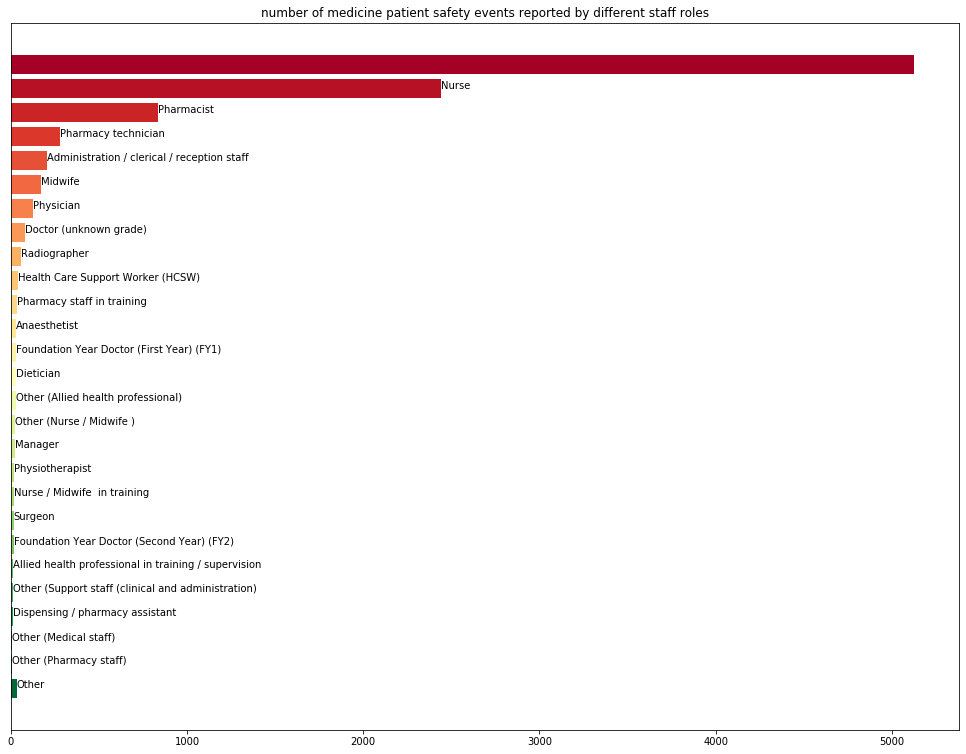

In [12]:
reportedby_counts = df['inc_reportedby'].value_counts()
#reportedby_counts = reportedby_counts.drop('',axis=0)
thresh = reportedby_counts[reportedby_counts.index == 'Other'].values[0] + 1
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]
plt.figure(figsize=(17,13))
cm = plt.get_cmap('RdYlGn')
cm_subsection = np.linspace(0, 1, len(reportedby_counts.values))
x_range = range(0,len(reportedby_counts.values))
colors = [cm(x) for x in cm_subsection]
reportedby_list = list(reportedby_counts.index)
for i in x_range:
    plt.barh(reportedby_list[-(i+1)],reportedby_counts.values[-(i+1)],color=colors[-(i+1)])
    plt.text(reportedby_counts.values[-(i+1)],i,reportedby_list[-(i+1)])
plt.yticks([])
plt.title("number of medicine patient safety events reported by different staff roles");